In [11]:
# install libraries
!pip install yfinance
!pip install beautifulsoup4
!pip install requests
!pip install pandas
!pip install html5lib
!pip install lxml
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 136.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 146.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 155.7 MB/s eta 0:00:00


In [26]:
# import dependencies
import pandas as pd
import requests
import matplotlib.pyplot as plt
import yfinance as yf
from bs4 import BeautifulSoup
from io import StringIO

## Question 1: Use yfinance to Extract Stock Data

In [17]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


##  Question 2: Use Webscraping to Extract Tesla Revenue Data

In [28]:
url_tesla = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_tesla = requests.get(url_tesla).text
soup_tesla = BeautifulSoup(html_tesla, "html.parser")
tesla_table = soup_tesla.find_all("table")[1]
tesla_revenue = pd.read_html(StringIO(str(tesla_table)))[0]
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue.dropna(inplace=True)
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,$31
49,2010-06-30,$28
50,2010-03-31,$21
52,2009-09-30,$46
53,2009-06-30,$27


## Question 3: Use yfinance to Extract Stock Data

In [24]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data

In [30]:
url_gme = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_gme = requests.get(url_gme).text
soup_gme = BeautifulSoup(html_gme, "html.parser")

gme_table = soup_gme.find_all("table")[1] 
gme_revenue = pd.read_html(StringIO(str(gme_table)))[0]

gme_revenue.columns = ["Date", "Revenue"]
gme_revenue.dropna(inplace=True)

gme_revenue.tail()

,Date,Revenue
57,2006-01-31,"$1,667"
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475
61,2005-01-31,$709


## Question 5: Plot Tesla Stock Graph

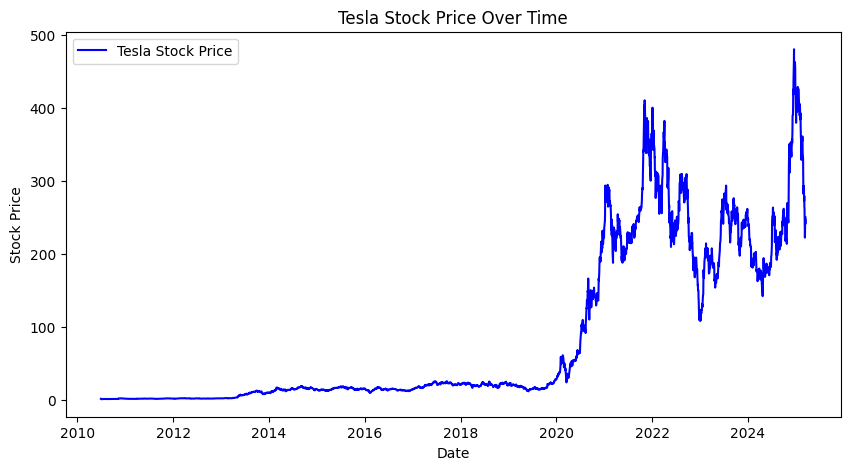

In [31]:
plt.figure(figsize=(10,5))
plt.plot(tesla_data["Date"], tesla_data["Close"], label="Tesla Stock Price", color="blue")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Tesla Stock Price Over Time")
plt.legend()
plt.show()

## Question 6: Plot GameStop Stock Graph

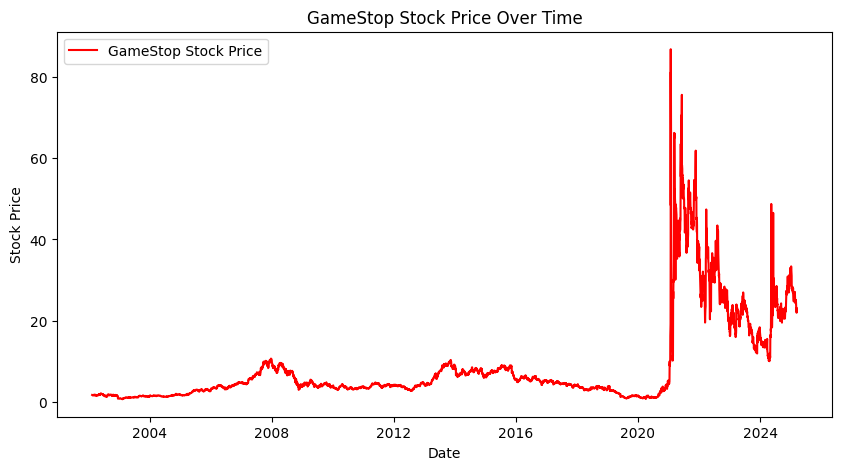

In [32]:
plt.figure(figsize=(10,5))
plt.plot(gme_data["Date"], gme_data["Close"], label="GameStop Stock Price", color="red")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("GameStop Stock Price Over Time")
plt.legend()
plt.show()